In [123]:
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import rankdata, spearmanr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

**NB**: Confusingly, the code and Pandas tables label a quantity `sim` which is actually the *distance* (correlation distance) between sentence pairs. Sorry. We'll fix this before sharing.

In [124]:
out_dir = Path("heatmap_run1")
rep1 = "elmo.2x4096"
rep2 = "infersent.allnli"
names = ["rep", "idx", "dist", "sent1", "sent2"]
try:
    dists = pd.read_csv(out_dir / ("sim_384sentences.%s_384sentences.%s.csv" % (rep1, rep2)), header=None, names=names)
except FileNotFoundError:
    dists = pd.read_csv(out_dir / ("sim_384sentences.%s_384sentences.%s.csv" % (rep2, rep1)), header=None, names=names)
    
dists = dists.set_index(["rep", "idx"])
dists.head()

sim  \
rep                      idx             
384sentences.elmo.2x4096 0    0.136120   
                         1    0.503826   
                         2    0.516924   
                         3    0.533812   
                         4    0.590919   

                                                                          sent1  \
rep                      idx                                                      
384sentences.elmo.2x4096 0                         A man is a male human adult.   
                         1    A frying pan is a small pan with sloping sides...   
                         2    Forks are usually  made of metal, or plastic, ...   
                         3    A dress is a piece of clothing that women some...   
                         4    The claw on the head can be used to remove nails.   

                                                                          sent2  
rep                      idx                                                     
384sentences.elmo.2x4096 0                     A woman is a female human adult.  
                         1    A frying pan is used to fry, sear and brown food.  
                         2    Walls are usually made of stone, brick, or cem...  
                         3    A glove is a piece of clothing that covers the...  
                         4    Screwdrivers can also be used to remove screws...

In [126]:
dists = dists.reset_index().set_index(["rep", "sent1", "sent2"]).sort_index()
dists.head()

idx  \
rep                      sent1                                              sent2                                                       
384sentences.elmo.2x4096 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...   1852   
                                                                            A bed is a piece of furniture used as a place t...  11106   
                                                                            A bed is made of a mattress and a box spring, p...   3507   
                                                                            A bee is a flying insect, with a black and yell...  69353   
                                                                            A bicycle is a vehicle with two wheels and peda...   7654   

                                                                                                                                     sim  
rep                      sent1                                              sent2                                                         
384sentences.elmo.2x4096 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.918857  
                                                                            A bed is a piece of furniture used as a place t...  0.969593  
                                                                            A bed is made of a mattress and a box spring, p...  0.938815  
                                                                            A bee is a flying insect, with a black and yell...  1.057835  
                                                                            A bicycle is a vehicle with two wheels and peda...  0.959950

In [127]:
pair_dists_rep1 = sims.loc["384sentences.%s" % rep1].dist
pair_dists_rep2 = sims.loc["384sentences.%s" % rep2].dist

In [128]:
pair_dists_rep1.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.       0.918857
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.            0.969593
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.    0.938815
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              1.057835
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                     0.959950
Name: sim, dtype

In [129]:
spearmanr(pair_dists_rep1, pair_dists_rep2)

SpearmanrResult(correlation=0.62287031136873716, pvalue=0.0)

Let's create and analyze rank data for the pairwise distance measures. Here a low pairwise rank = low pairwise distance = high pairwise similarity.

In [130]:
rep1_ranks = rankdata(pair_dists_rep1)
rep2_ranks = rankdata(pair_dists_rep2)

In [131]:
list(zip(rep1_ranks, rep2_ranks))[:20]

[(1853.0, 1089.0),
 (11107.0, 10145.0),
 (3508.0, 2358.0),
 (69354.0, 38765.0),
 (7655.0, 24827.0),
 (51009.0, 67593.0),
 (48417.0, 66914.5),
 (25019.0, 61458.5),
 (1667.0, 7471.0),
 (20213.0, 6631.5),
 (21601.5, 12199.5),
 (10642.0, 7069.0),
 (41234.5, 69559.5),
 (21078.5, 33219.0),
 (4564.0, 4318.0),
 (60908.5, 7186.5),
 (7527.0, 2613.0),
 (8556.5, 6767.5),
 (68174.0, 46899.0),
 (14702.5, 62601.0)]

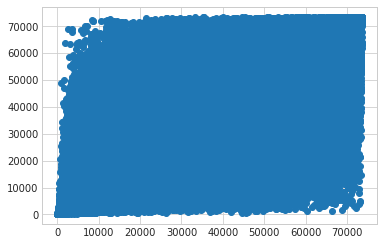

In [132]:
plt.scatter(rep1_ranks, rep2_ranks)

In [133]:
# Add rank information to main dataframe.
dists.loc[("384sentences.%s" % rep1, slice(None), slice(None)), "dist_rank"] = rep1_ranks
dists.loc[("384sentences.%s" % rep2, slice(None), slice(None)), "dist_rank"] = rep2_ranks
dists.head()

idx  \
rep                      sent1                                              sent2                                                       
384sentences.elmo.2x4096 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...   1852   
                                                                            A bed is a piece of furniture used as a place t...  11106   
                                                                            A bed is made of a mattress and a box spring, p...   3507   
                                                                            A bee is a flying insect, with a black and yell...  69353   
                                                                            A bicycle is a vehicle with two wheels and peda...   7654   

                                                                                                                                     sim  \
rep                      sent1                                              sent2                                                          
384sentences.elmo.2x4096 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.918857   
                                                                            A bed is a piece of furniture used as a place t...  0.969593   
                                                                            A bed is made of a mattress and a box spring, p...  0.938815   
                                                                            A bee is a flying insect, with a black and yell...  1.057835   
                                                                            A bicycle is a vehicle with two wheels and peda...  0.959950   

                                                                                                                                sim_rank  
rep                      sent1                                              sent2                                                         
384sentences.elmo.2x4096 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...    1853.0  
                                                                            A bed is a piece of furniture used as a place t...   11107.0  
                                                                            A bed is made of a mattress and a box spring, p...    3508.0  
                                                                            A bee is a flying insect, with a black and yell...   69354.0  
                                                                            A bicycle is a vehicle with two wheels and peda...    7655.0

## Rank differences

Let's compare differences in the ranks of sentence pair distances, arbitrarily taking the difference `rep1_rank - rep2_rank`. Highly negative values indicate that `rep1` ranks the pair far lower distance (higher similarity) than `rep2`.

In [134]:
sim_rank_differences = sims.loc["384sentences.%s" % rep1].sim_rank - sims.loc["384sentences.%s" % rep2].sim_rank
sim_rank_differences.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.         764.0
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.              962.0
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.     1150.0
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              30589.0
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                    -17172.0
Name: sim_rank, dtype

Let's look at the extremes of the rank difference series. Extremely negative sentence pairs here are those scored highly similar by `rep1` relative to `rep2`.

In [135]:
sim_rank_differences.sort_values()

sent1                                                                                  sent2                                                                               
The term is used to indicate sex distinctions relative to girls.                       A glove is a piece of clothing that covers the hand and fingers.                       -66512.5
A forest is an area with a high density of trees and canopy cover.                     Whales breathe through blowholes on their heads when surfacing.                        -65399.5
Manhood is associated with masculinity and virility.                                   Pressing a piano key causes a felt-tipped hammer to hit a vibrating steel string.      -64273.0
Elephants are the largest kind of land mammal, weighing several tons.                  When open, a window will also let air and sound through.                               -63973.0
Axes are used by woodcutters and firemen entering buildings.                           An elepha